In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

Steady-state height is 11.516347741393002 mm


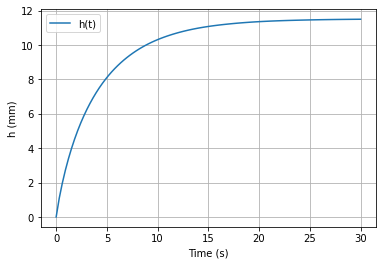

In [18]:
# First Model Draft

# Data
Qin = 7 * 10**(4)  # mm³/s
fv = 0.3
d_ifp = 25 # mm
d_i = 140 # mm
g = 9810  # mm/s²
h_max = 630 # mm

def h(t, h, Qin, fv, d_ifp, d_i, g, h_max):
    if h <= h_max:
        dhdt = (Qin - (1/4) * fv * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)
    else: 
        dhdt = 0
    return dhdt

# Initial value
h0 = [0]

# Time span
t = np.linspace(0, 30, 100)
t_span = (t[0], t[-1])

# Solve the differential equation
sol = solve_ivp(h, t_span, h0, args=(Qin, fv, d_ifp, d_i, g, h_max), t_eval=t)

if fv !=0:
    h_steady_state = (8/g)*(Qin/(fv*np.pi*(d_ifp)**2))**2
    print(f"Steady-state height is {h_steady_state} mm")
else:
    print(f"No steady-state")

# Plot results
plt.plot(sol.t, sol.y[0], label="h(t)")
plt.xlabel("Time (s)")
plt.ylabel("h (mm)")
plt.grid()
plt.legend()
plt.show()

## Training the model

Fitted d_ifp: 21.50 mm
Fitted d_i: 126.22 mm
Fitted C: 0.10
0.9968805431334935


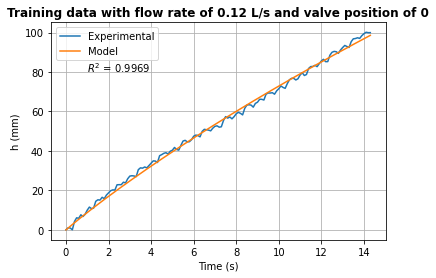

No steady-state


In [19]:
# Training the model with filling data set

# Data
Qin = 12 * 10**(4)  # mm³/s
fv = 0
g = 9810  # mm/s²
h_max = 630 # mm

def h(t, h, Qin, fv, d_ifp, d_i, g, h_max, C):
    if h <= h_max:
        dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)
    else: 
        dhdt = 0
    return dhdt

def solve_h(t, d_ifp, d_i, C):
    h0 = [0]
    t_span = (t[0], t[-1])
    # Solve the differential equation
    sol = solve_ivp(h, t_span, h0, args=(Qin, fv, d_ifp, d_i, g, h_max, C), t_eval=t)
    return sol.y[0]

# Filling the tank
filling_empty_measurement = np.genfromtxt("filling_empty_experiment.csv", delimiter=',')

time = filling_empty_measurement[:, 0][106:250]
time = time - time[0]
height = filling_empty_measurement[:, 1][106:250]

def fit_function(t, d_ifp, d_i, C):
    return solve_h(t, d_ifp, d_i, C)

# Initial guesses for d_ifp and d_i
initial_guess = [25, 155, 0]

# Perform curve fitting
optimal_params, _ = curve_fit(fit_function, time, height, p0=initial_guess)

# Extract fitted parameters
fitted_d_ifp, fitted_d_i, fitted_C = optimal_params
print(f"Fitted d_ifp: {fitted_d_ifp:.2f} mm")
print(f"Fitted d_i: {fitted_d_i:.2f} mm")
print(f"Fitted C: {fitted_C:.2f}")

# Solve using fitted parameters
fitted_height = solve_h(time, fitted_d_ifp, fitted_d_i, fitted_C)

R1 = r2_score(height, fitted_height)
print(R1)

# Plot results
plt.plot(time, height, label='Experimental')
plt.title("Training data with flow rate of 0.12 L/s and valve position of 0", weight='bold', size=12)
#plt.plot(time - 10, height, label='Experimental') # Delay of 10 seconds!
plt.plot(time, fitted_height, label='Model')
plt.xlabel("Time (s)")
plt.ylabel("h (mm)")
plt.grid()
plt.text(1, 80, f"$R^2$ = {R1:.4f}")
plt.legend()
plt.show()

d_i_fits = []
d_ifp_fits = []
C_fits = []
time_delay = []

d_i_fits.append(optimal_params[1])
d_ifp_fits.append(optimal_params[0])
C_fits.append(optimal_params[2])
time_delay.append(10)

# Steady-state height:
if fv !=0:
    h_steady_state = (8/g)*(Qin/((fv + fitted_C)*np.pi*(fitted_d_ifp)**2))**2
    print(f"Steady-state height is {h_steady_state} mm")
else:
    print(f"No steady-state")

<ipython-input-20-cea2110b1a6d>:11: RuntimeWarning: invalid value encountered in sqrt
  dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)


Fitted d_ifp: 20.03 mm
Fitted d_i: 178.82 mm
Fitted C: -0.21
Steady-state height is 51.73067257188774 mm


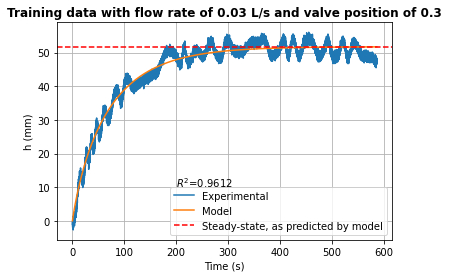

In [20]:
# Training the model

# Data
Qin = 3 * 10**(4)  # mm³/s
fv = 0.3
g = 9810  # mm/s²
h_max = 630 # mm

def h(t, h, Qin, fv, d_ifp, d_i, g, h_max, C):
    if h <= h_max:
        dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)
    else: 
        dhdt = 0
    return dhdt

def solve_h(t, d_ifp, d_i, C):
    h0 = [0]
    t_span = (t[0], t[-1])
    # Solve the differential equation
    sol = solve_ivp(h, t_span, h0, args=(Qin, fv, d_ifp, d_i, g, h_max, C), t_eval=t)
    return sol.y[0]

# Filling the tank
f_003_v_03 = np.genfromtxt("flow_0.03_valve_0.3.csv", delimiter=',')

time_1 = f_003_v_03[:, 0][166:]
time_1 = time_1 - time_1[0]
height_1 = f_003_v_03[:, 1][166:]

def fit_function(t, d_ifp, d_i, C):
    return solve_h(t, d_ifp, d_i, C)

# Initial guesses for d_ifp and d_i
initial_guess = [25, 140, 0]

# Perform curve fitting
optimal_params_1, _ = curve_fit(fit_function, time_1, height_1, p0=initial_guess)

# Extract fitted parameters
fitted_d_ifp_1, fitted_d_i_1, fitted_C_1 = optimal_params_1
print(f"Fitted d_ifp: {fitted_d_ifp_1:.2f} mm")
print(f"Fitted d_i: {fitted_d_i_1:.2f} mm")
print(f"Fitted C: {fitted_C_1:.2f}")

# Solve using fitted parameters
fitted_height_1 = solve_h(time_1, fitted_d_ifp_1, fitted_d_i_1, fitted_C_1)

R2 = r2_score(height_1, fitted_height_1)

# Steady-state height:
if fv !=0:
    h_steady_state = (8/g)*(Qin/((fv + fitted_C_1)*np.pi*(fitted_d_ifp_1)**2))**2
    print(f"Steady-state height is {h_steady_state} mm")
else:
    print(f"No steady-state")


h_steady_state_1 = h_steady_state
# Plot results
plt.title('Training data with flow rate of 0.03 L/s and valve position of 0.3', weight='bold', size=12)
plt.plot(time_1, height_1, label='Experimental')
#plt.plot(time_1 - 20, height_1, label='Experimental') # Delay of 20 seconds!
plt.plot(time_1, fitted_height_1, label='Model')
plt.axhline(h_steady_state, color='red', linestyle='--', label='Steady-state, as predicted by model')
plt.xlabel("Time (s)")
plt.ylabel("h (mm)")
plt.text(200, 10, f"$R^2$={R2:.4f}")
plt.grid()
plt.legend()
plt.show()

d_i_fits.append(optimal_params_1[1])
d_ifp_fits.append(optimal_params_1[0])
C_fits.append(optimal_params_1[2])
time_delay.append(20)

<ipython-input-21-cf1624f29429>:11: RuntimeWarning: invalid value encountered in sqrt
  dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)


Fitted d_ifp: 20.11 mm
Fitted d_i: 119.20 mm
Fitted C: -0.20
Steady-state height is 134.76924128889127 mm


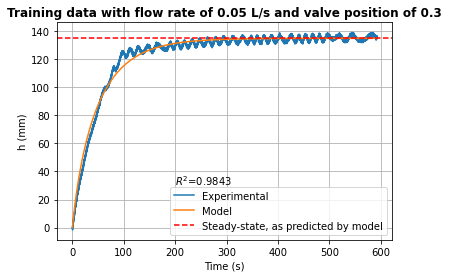

In [21]:
# Training the model

# Data
Qin = 5 * 10**(4)  # mm³/s
fv = 0.3
g = 9810  # mm/s²
h_max = 630 # mm

def h(t, h, Qin, fv, d_ifp, d_i, g, h_max, C):
    if h <= h_max:
        dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)
    else: 
        dhdt = 0
    return dhdt

def solve_h(t, d_ifp, d_i, C):
    h0 = [0]
    t_span = (t[0], t[-1])
    # Solve the differential equation
    sol = solve_ivp(h, t_span, h0, args=(Qin, fv, d_ifp, d_i, g, h_max, C), t_eval=t)
    return sol.y[0]

# Filling the tank
f_005_v_03 = np.genfromtxt("Flow_0.05_valve_0.3", delimiter=',')

time_2 = f_005_v_03[:, 0][111:]
time_2 = time_2 - time_2[0]
height_2 = f_005_v_03[:, 1][111:]

def fit_function(t, d_ifp, d_i, C):
    return solve_h(t, d_ifp, d_i, C)

# Initial guesses for d_ifp and d_i
initial_guess = [25, 140, 0]

# Perform curve fitting
optimal_params_2, _ = curve_fit(fit_function, time_2, height_2, p0=initial_guess)

# Extract fitted parameters
fitted_d_ifp_2, fitted_d_i_2, fitted_C_2 = optimal_params_2
print(f"Fitted d_ifp: {fitted_d_ifp_2:.2f} mm")
print(f"Fitted d_i: {fitted_d_i_2:.2f} mm")
print(f"Fitted C: {fitted_C_2:.2f}")

# Solve using fitted parameters
fitted_height_2 = solve_h(time_2, fitted_d_ifp_2, fitted_d_i_2, fitted_C_2)

R3 = r2_score(height_2, fitted_height_2)

# Steady-state height:
if fv !=0:
    h_steady_state = (8/g)*(Qin/((fv + fitted_C_2)*np.pi*(fitted_d_ifp_2)**2))**2
    print(f"Steady-state height is {h_steady_state} mm")
else:
    print(f"No steady-state")
h_steady_state_2 = h_steady_state
# Plot results
plt.title("Training data with flow rate of 0.05 L/s and valve position of 0.3", weight='bold', size=12)
plt.plot(time_2, height_2, label='Experimental')
#plt.plot(time_2 - 11, height_2, label='Experimental') # Delay of 20 seconds!
plt.plot(time_2, fitted_height_2, label='Model')
plt.axhline(h_steady_state, color='red', linestyle='--', label='Steady-state, as predicted by model')
plt.xlabel("Time (s)")
plt.ylabel("h (mm)")
plt.text(200, 30, f"$R^2$={R3:.4f}")
plt.grid()
plt.legend()
plt.show()

d_i_fits.append(optimal_params_2[1])
d_ifp_fits.append(optimal_params_2[0])
C_fits.append(optimal_params_2[2])
time_delay.append(11)

<ipython-input-22-d38de87cff26>:11: RuntimeWarning: invalid value encountered in sqrt
  dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)


Fitted d_ifp: 18.56 mm
Fitted d_i: 95.89 mm
Fitted C: -0.25
Steady-state height is 28.20073700539026 mm


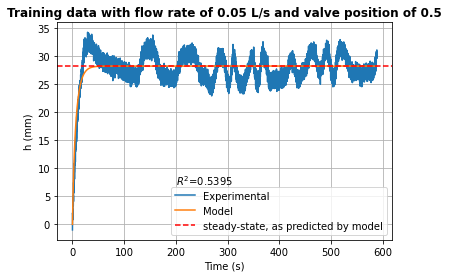

In [22]:
# Training the model

# Data
Qin = 5 * 10**(4)  # mm³/s
fv = 0.5
g = 9810  # mm/s²
h_max = 630 # mm

def h(t, h, Qin, fv, d_ifp, d_i, g, h_max, C):
    if h <= h_max:
        dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)
    else: 
        dhdt = 0
    return dhdt

def solve_h(t, d_ifp, d_i, C):
    h0 = [0]
    t_span = (t[0], t[-1])
    # Solve the differential equation
    sol = solve_ivp(h, t_span, h0, args=(Qin, fv, d_ifp, d_i, g, h_max, C), t_eval=t)
    return sol.y[0]

# Filling the tank
f_005_v_05 = np.genfromtxt("Flow_0.05_valve_0.5.csv", delimiter=',')

time_3 = f_005_v_05[:, 0][125:]
time_3 = time_3 - time_3[0]
height_3 = f_005_v_05[:, 1][125:]

def fit_function(t, d_ifp, d_i, C):
    return solve_h(t, d_ifp, d_i, C)

# Initial guesses for d_ifp and d_i
initial_guess = [25, 140, 0]

# Perform curve fitting
optimal_params_3, _ = curve_fit(fit_function, time_3, height_3, p0=initial_guess)

# Extract fitted parameters
fitted_d_ifp_3, fitted_d_i_3, fitted_C_3 = optimal_params_3
print(f"Fitted d_ifp: {fitted_d_ifp_3:.2f} mm")
print(f"Fitted d_i: {fitted_d_i_3:.2f} mm")
print(f"Fitted C: {fitted_C_3:.2f}")

# Solve using fitted parameters
fitted_height_3 = solve_h(time_3, fitted_d_ifp_3, fitted_d_i_3, fitted_C_3)

R4 = r2_score(height_3, fitted_height_3)

# Steady-state height:
if fv !=0:
    h_steady_state = (8/g)*(Qin/((fv + fitted_C_3)*np.pi*(fitted_d_ifp_3)**2))**2
    print(f"Steady-state height is {h_steady_state} mm")
else:
    print(f"No steady-state")
h_steady_state_3 = h_steady_state
# Plot results
plt.title("Training data with flow rate of 0.05 L/s and valve position of 0.5", weight='bold', size=12)
plt.plot(time_3, height_3, label='Experimental')
#plt.plot(time_3 - 11, height_3, label='Experimental') # Delay of 20 seconds!
plt.plot(time_3, fitted_height_3, label='Model')
plt.axhline(h_steady_state, color='red', linestyle='--', label= 'steady-state, as predicted by model')
plt.xlabel("Time (s)")
plt.ylabel("h (mm)")
plt.text(200, 7, f"$R^2$={R4:.4f}")
plt.grid()
plt.legend()
plt.show()

d_i_fits.append(optimal_params_3[1])
d_ifp_fits.append(optimal_params_3[0])
C_fits.append(optimal_params_3[2])
time_delay.append(11)

<ipython-input-23-07a326b5894a>:11: RuntimeWarning: invalid value encountered in sqrt
  dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)


Fitted d_ifp: 15.91 mm
Fitted d_i: 184.76 mm
Fitted C: -0.26
Steady-state height is 78.65544180622793 mm


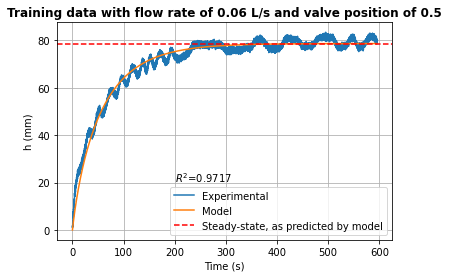

In [23]:
# Training the model

# Data
Qin = 6 * 10**(4)  # mm³/s
fv = 0.5
g = 9810  # mm/s²
h_max = 630 # mm

def h(t, h, Qin, fv, d_ifp, d_i, g, h_max, C):
    if h <= h_max:
        dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)
    else: 
        dhdt = 0
    return dhdt

def solve_h(t, d_ifp, d_i, C):
    h0 = [0]
    t_span = (t[0], t[-1])
    # Solve the differential equation
    sol = solve_ivp(h, t_span, h0, args=(Qin, fv, d_ifp, d_i, g, h_max, C), t_eval=t)
    return sol.y[0]

# Filling the tank
f_006_v_05 = np.genfromtxt("Flow_0.06_valve_0.5.csv", delimiter=',')

time_4 = f_006_v_05[:, 0][87:]
time_4 = time_4 - time_4[0]
height_4 = f_006_v_05[:, 1][87:]

def fit_function(t, d_ifp, d_i, C):
    return solve_h(t, d_ifp, d_i, C)

# Initial guesses for d_ifp and d_i
initial_guess = [25, 140, 0]

# Perform curve fitting
optimal_params_4, _ = curve_fit(fit_function, time_4, height_4, p0=initial_guess)

# Extract fitted parameters
fitted_d_ifp_4, fitted_d_i_4, fitted_C_4 = optimal_params_4
print(f"Fitted d_ifp: {fitted_d_ifp_4:.2f} mm")
print(f"Fitted d_i: {fitted_d_i_4:.2f} mm")
print(f"Fitted C: {fitted_C_4:.2f}")

# Solve using fitted parameters
fitted_height_4 = solve_h(time_4, fitted_d_ifp_4, fitted_d_i_4, fitted_C_4)

# Steady-state height:
if fv !=0:
    h_steady_state = (8/g)*(Qin/((fv + fitted_C_4)*np.pi*(fitted_d_ifp_4)**2))**2
    print(f"Steady-state height is {h_steady_state} mm")
else:
    print(f"No steady-state")

R5 = r2_score(height_4, fitted_height_4)
h_steady_state_4 = h_steady_state
# Plot results
plt.title("Training data with flow rate of 0.06 L/s and valve position of 0.5", weight='bold', size=12)
plt.plot(time_4, height_4, label='Experimental')
#plt.plot(time_4 - 8, height_4, label='Experimental') # Delay of 20 seconds!
plt.plot(time_4, fitted_height_4, label='Model')
plt.axhline(h_steady_state, color='red', linestyle='--', label='Steady-state, as predicted by model')
plt.xlabel("Time (s)")
plt.ylabel("h (mm)")
plt.text(200, 20, f"$R^2$={R5:.4f}")
plt.grid()
plt.legend()
plt.show()

d_i_fits.append(optimal_params_4[1])
d_ifp_fits.append(optimal_params_4[0])
C_fits.append(optimal_params_4[2])
time_delay.append(8)

## Testing the model

In [24]:
d_i = np.mean(d_i_fits)
d_ifp = np.mean(d_ifp_fits)
C = np.mean(C_fits)

print(np.max(C_fits))

0.09605513978644742


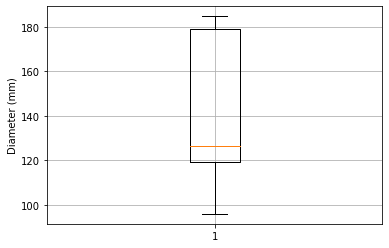

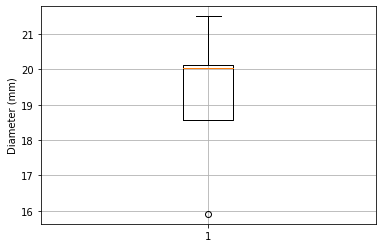

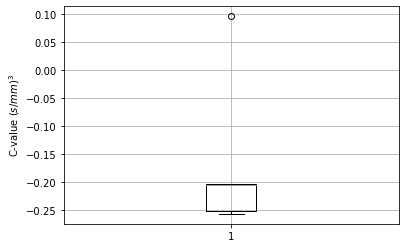

95.88594983625502
184.75656629781446
126.22372806316119
15.909958097375666
21.50120727255181
20.025086985455246
-0.25705419275264335
0.09605513978644742
-0.20545055435448567


In [25]:
plt.boxplot(d_i_fits)
plt.ylabel("Diameter (mm)")
plt.grid()
plt.show()

plt.boxplot(d_ifp_fits)
plt.ylabel("Diameter (mm)")
plt.grid()
plt.show()

plt.boxplot(C_fits)
plt.ylabel('C-value $(s/mm)^3$')
plt.grid()
plt.show()

print(np.min(d_i_fits))
print(np.max(d_i_fits))
print(np.median(d_i_fits))

print(np.min(d_ifp_fits))
print(np.max(d_ifp_fits))
print(np.median(d_ifp_fits))

print(np.min(C_fits))
print(np.max(C_fits))
print(np.median(C_fits))

Steady-state height is 439.68639796875163 mm


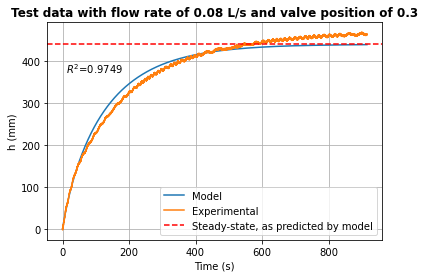

In [26]:
# First Model Test

# Data
Qin = 8 * 10**(4)  # mm³/s
fv = 0.3
d_ifp = 17 # mm
d_i = 134 # mm
g = 9810  # mm/s²
h_max = 630 # mm
C = -0.18

f_008_v_03 = np.genfromtxt("Flow_0.08_valve_0.3_experiment", delimiter=',')

time_6 = f_008_v_03[:, 0][156:]
time_6 = time_6 - time_6[0]
height_6 = f_008_v_03[:,1][156:]

def h(t, h, Qin, fv, d_ifp, d_i, g, h_max, C):
    if h <= h_max:
        dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)
    else: 
        dhdt = 0
    return dhdt

# Initial value
h0 = [0]

# Time span
t = np.linspace(0, time_6[-1], 100)
t_span = (t[0], t[-1])

# Solve the differential equation
sol = solve_ivp(h, t_span, h0, args=(Qin, fv, d_ifp, d_i, g, h_max, C), t_eval=time_6)

if fv !=0:
    h_steady_state = (8/g)*(Qin/((fv + C)*np.pi*(d_ifp)**2))**2
    print(f"Steady-state height is {h_steady_state} mm")
else:
    print(f"No steady-state")

r2_value = r2_score(height_6, sol.y[0])

# Plot results
plt.title("Test data with flow rate of 0.08 L/s and valve position of 0.3", weight='bold', size=12)
plt.plot(sol.t, sol.y[0], label="Model")
plt.plot(time_6, height_6, label='Experimental')
plt.axhline(h_steady_state, color='red', linestyle='--', label='Steady-state, as predicted by model')
plt.xlabel("Time (s)")
plt.ylabel("h (mm)")
plt.text(10, 370, f"$R^2$={r2_value:.4f}")
plt.grid()
plt.legend()
plt.show()

Steady-state height is 955.9310611398402 mm
Steady-state height is 955.9310611398402 mm
Steady-state height is 955.9310611398402 mm
Steady-state height is 439.68639796875163 mm
Steady-state height is 439.68639796875163 mm
Steady-state height is 439.68639796875163 mm
Steady-state height is 94.01100197055513 mm
Steady-state height is 94.01100197055513 mm
Steady-state height is 94.01100197055513 mm


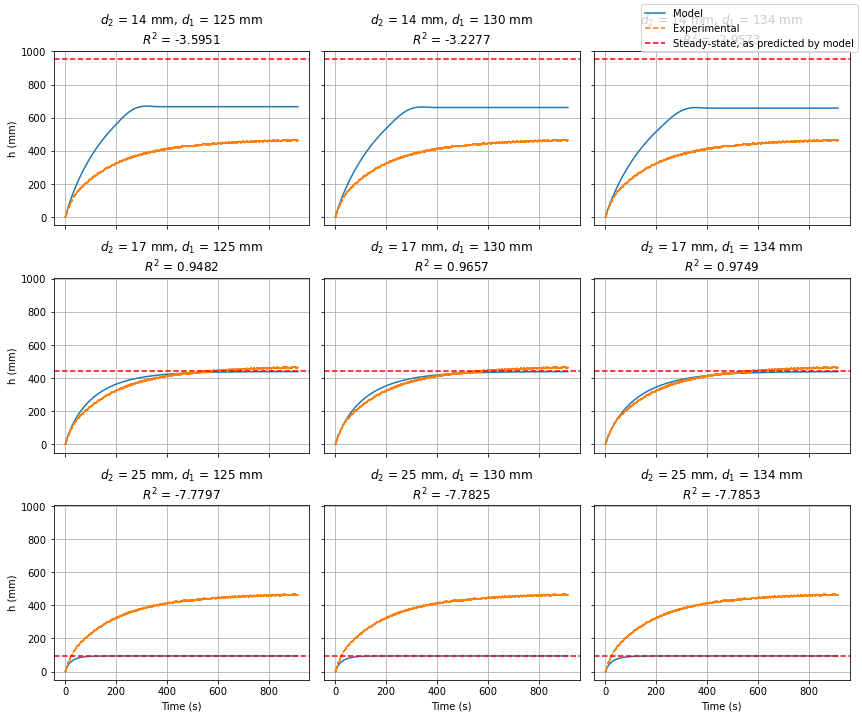

In [27]:
# Define parameter ranges
d_ifp_values = [14, 17, 25]  # Different d_ifp values (mm)
d_i_values = [125, 130, 134]  # Different d_i values (mm)

# Create subplots
fig, axes = plt.subplots(len(d_ifp_values), len(d_i_values), figsize=(12, 10), sharex=True, sharey=True)

# Loop through different values of d_ifp and d_i
for i, d_ifp in enumerate(d_ifp_values):
    for j, d_i in enumerate(d_i_values):
        
        # Solve the differential equation
        sol = solve_ivp(h, (time_6[0], time_6[-1]), [0], args=(Qin, fv, d_ifp, d_i, g, h_max, C), t_eval=time_6)

        if fv !=0:
            h_steady_state = (8/g)*(Qin/((fv + C)*np.pi*(d_ifp)**2))**2
            print(f"Steady-state height is {h_steady_state} mm")
        else:
            print(f"No steady-state")

        # Compute R² score
        r2_value = r2_score(height_6, sol.y[0])

        # Plot results
        ax = axes[i, j]
        ax.plot(sol.t, sol.y[0], label="Model")
        ax.plot(time_6, height_6, label="Experimental", linestyle="dashed")
        ax.set_title(f"$d_{{2}}$ = {d_ifp} mm, $d_{{1}}$ = {d_i} mm\n$R^2$ = {r2_value:.4f}")
        ax.axhline(h_steady_state, color="red", linestyle="--", label="Steady-state, as predicted by model")
        ax.grid()

        if i == len(d_ifp_values) - 1:
            ax.set_xlabel("Time (s)")
        if j == 0:
            ax.set_ylabel("h (mm)")

# Add legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()

Steady-state height is 336.63489844482535 mm


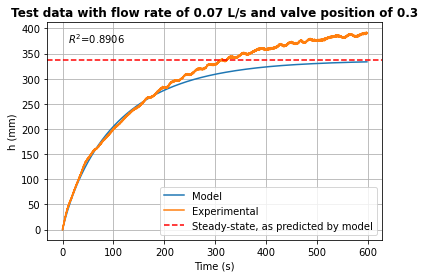

In [28]:
# Testing the model

# Data
Qin = 7 * 10**(4)  # mm³/s
fv = 0.3
d_ifp = 17 # mm
d_i = 134 # mm
g = 9810  # mm/s²
h_max = 630 # mm
C = -0.18

f_007_v_03 = np.genfromtxt("Flow_0.07_valve_0.3.csv", delimiter=',')

time_5 = f_007_v_03[:, 0][77:]
time_5 = time_5 - time_5[0]
height_5 = f_007_v_03[:,1][77:]

def h(t, h, Qin, fv, d_ifp, d_i, g, h_max, C):
    if h <= h_max:
        dhdt = (Qin - (1/4) * (fv + C) * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)
    else: 
        dhdt = 0
    return dhdt

# Initial value
h0 = [0]

# Time span
t = np.linspace(time_5[0], time_5[-1], 100)
t_span = (t[0], t[-1])

# Solve the differential equation
sol = solve_ivp(h, t_span, h0, args=(Qin, fv, d_ifp, d_i, g, h_max, C), t_eval=time_5)

if fv !=0:
    h_steady_state = (8/g)*(Qin/((fv + C)*np.pi*(d_ifp)**2))**2
    print(f"Steady-state height is {h_steady_state} mm")
else:
    print(f"No steady-state")

R6 = r2_score(height_5, sol.y[0])

# Plot results
plt.title("Test data with flow rate of 0.07 L/s and valve position of 0.3", weight='bold', size=12)
plt.plot(sol.t, sol.y[0], label="Model")
plt.plot(time_5, height_5, label='Experimental')
plt.axhline(h_steady_state, color='red', linestyle='--', label='Steady-state, as predicted by model')
plt.xlabel("Time (s)")
plt.ylabel("h (mm)")
plt.text(10, 370, f"$R^2$={R6:.4f}")
plt.grid()
plt.legend()
plt.show()

Steady-state height is 731.8847186851901 mm
Steady-state height is 731.8847186851901 mm
Steady-state height is 731.8847186851901 mm
Steady-state height is 336.63489844482535 mm
Steady-state height is 336.63489844482535 mm
Steady-state height is 336.63489844482535 mm
Steady-state height is 175.72552095631414 mm
Steady-state height is 175.72552095631414 mm
Steady-state height is 175.72552095631414 mm


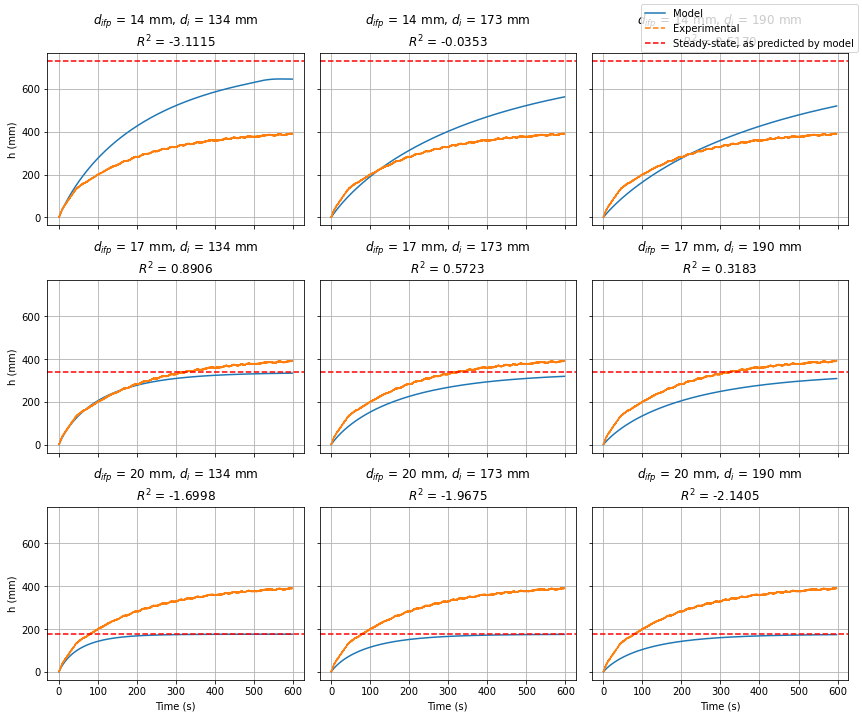

In [29]:
# Define parameter ranges
d_ifp_values = [14, 17, 20]  # Different d_ifp values (mm)
d_i_values = [134, 173, 190]  # Different d_i values (mm)

# Create subplots
fig, axes = plt.subplots(len(d_ifp_values), len(d_i_values), figsize=(12, 10), sharex=True, sharey=True)

# Loop through different values of d_ifp and d_i
for i, d_ifp in enumerate(d_ifp_values):
    for j, d_i in enumerate(d_i_values):
        
        # Solve the differential equation
        sol = solve_ivp(h, (time_5[0], time_5[-1]), [0], args=(Qin, fv, d_ifp, d_i, g, h_max, C), t_eval=time_5)

        # Compute R² score
        r2_value = r2_score(height_5, sol.y[0])

        if fv !=0:
            h_steady_state = (8/g)*(Qin/((fv + C)*np.pi*(d_ifp)**2))**2
            print(f"Steady-state height is {h_steady_state} mm")
        else:
            print(f"No steady-state")

        # Plot results
        ax = axes[i, j]
        ax.plot(sol.t, sol.y[0], label="Model")
        ax.plot(time_5, height_5, label="Experimental", linestyle="dashed")
        ax.set_title(f"$d_{{ifp}}$ = {d_ifp} mm, $d_i$ = {d_i} mm\n$R^2$ = {r2_value:.4f}")
        ax.axhline(h_steady_state, color="red", linestyle="--", label="Steady-state, as predicted by model")
        ax.grid()

        if i == len(d_ifp_values) - 1:
            ax.set_xlabel("Time (s)")
        if j == 0:
            ax.set_ylabel("h (mm)")

# Add legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()

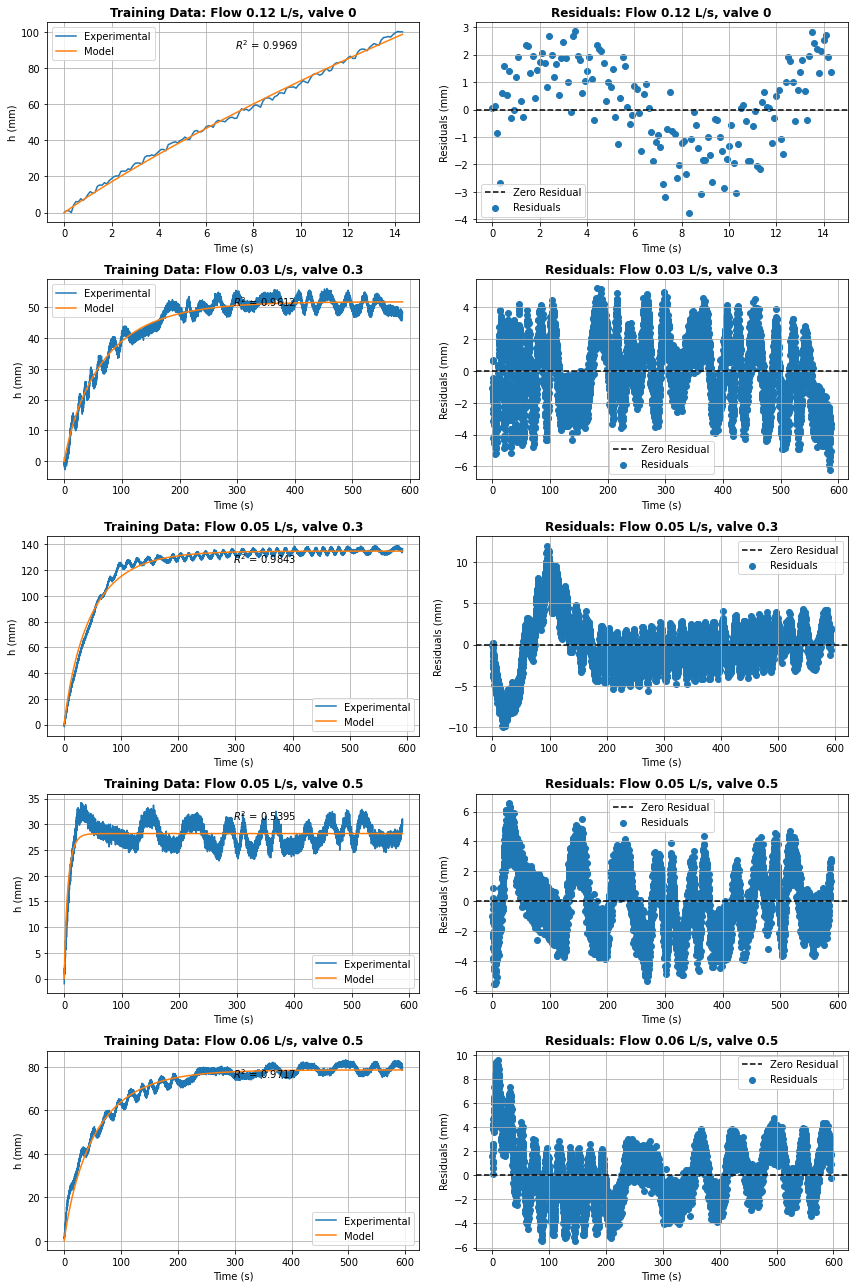

In [34]:


# import matplotlib.pyplot as plt

# Create a 2-column, 5-row figure
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

# Data for each row (experimental vs. model)
datasets = [
    (time, height, fitted_height, "0.12 L/s, valve 0", R1),
    (time_1, height_1, fitted_height_1, "0.03 L/s, valve 0.3", R2),
    (time_2, height_2, fitted_height_2, "0.05 L/s, valve 0.3", R3),
    (time_3, height_3, fitted_height_3, "0.05 L/s, valve 0.5", R4),
    (time_4, height_4, fitted_height_4, "0.06 L/s, valve 0.5", R5)
]

# Loop through datasets and plot
for i, (time_i, height_i, fitted_i, label, R2_value) in enumerate(datasets):
    # Original plot (Left Column)
    axes[i, 0].set_title(f"Training Data: Flow {label}", weight='bold', size=12)
    axes[i, 0].plot(time_i, height_i, label='Experimental')
    axes[i, 0].plot(time_i, fitted_i, label='Model')
    axes[i, 0].set_xlabel("Time (s)")
    axes[i, 0].set_ylabel("h (mm)")
    axes[i, 0].text(time_i[len(time_i)//2], max(height_i)*0.9, f"$R^2$ = {R2_value:.4f}")
    axes[i, 0].grid()
    axes[i, 0].legend()

    # Residuals plot (Right Column)
    residuals = height_i - fitted_i
    axes[i, 1].set_title(f"Residuals: Flow {label}", weight='bold', size=12)
    axes[i, 1].scatter(time_i, residuals, label="Residuals")
    axes[i, 1].axhline(0, color='black', linestyle='--', label="Zero Residual")
    axes[i, 1].set_xlabel("Time (s)")
    axes[i, 1].set_ylabel("Residuals (mm)")
    axes[i, 1].grid()
    axes[i, 1].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
fig.savefig("Assignment_2_Training+Residuals.png", dpi=300, bbox_inches="tight")

plt.show()
